In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import Image

In [2]:
df = pd.read_csv('data/heart.csv') # loading the dataset
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
#Viewing the 2 columns to convert as np
df_MaxHR = df.MaxHR
df_Heart_Disease = df.HeartDisease
df_MaxHR, df_Heart_Disease

(0      172
 1      156
 2       98
 3      108
 4      122
       ... 
 913    132
 914    141
 915    115
 916    174
 917    173
 Name: MaxHR, Length: 918, dtype: int64,
 0      0
 1      1
 2      0
 3      1
 4      0
       ..
 913    1
 914    1
 915    1
 916    1
 917    0
 Name: HeartDisease, Length: 918, dtype: int64)

In [4]:
#Converting to np for ez feeding the row values in the sigmoid function
x_train = df.MaxHR.to_numpy().reshape((len(df_MaxHR)), 1) #Reshaping to make it a 2d vector
y_train = df.HeartDisease.to_numpy()# Just 1D vector
x_train.shape, y_train.shape 

((918, 1), (918,))

In [5]:
#Filtering the 2 column to Visualize then later I can easily add the prediction columns
df_slice = ['MaxHR', 'HeartDisease']
df_filter = df.filter(df_slice)
df_filter


,MaxHR,HeartDisease
0,172,0
1,156,1
2,98,0
3,108,1
4,122,0
...,...,...
913,132,1
914,141,1
915,115,1
916,174,1


In [6]:
#This is just a visualization using plotly but I will us matplotlib for simplicity
px.scatter(df, x = 'MaxHR', y = 'HeartDisease')
 

<h3>We can see in the chart that if the MaxHr is lesser are mostly in the y axis of 1 and the higher the heart is in 0 or the Heart Disease has high probabilty of become 0 or False. We can use the the logistic regression to predict the outcome for this kind of data.</h3>

In [7]:
#The sigmoid Function I add epsilon to prevent error as soon as the exponential value gets to high can cause Runtime overflow error.
def sigmoid(z):
    epsilon = 1e-15
    return 1/(1+np.exp(-z + epsilon)) #np.exp is equivalent to eulers number^input or e^-z

Text(0, 0.5, 'Y Sigmoid')

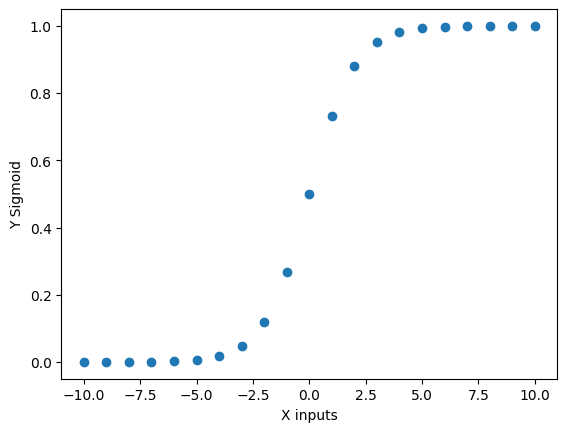

In [8]:
#Testing the sigmoid function by generating vector
x_nums = np.arange(-10,11) #vector x from -10 to 11 
y_sig = sigmoid(x_nums)

plt.scatter(x_nums,y_sig)
plt.xlabel('X inputs')
plt.ylabel('Y Sigmoid')


In [9]:
#The Logistic Regression Model almost the same as linear regression but the sigmoid function is present for each iteration in the linear equation
def logistic_regression_model(x,y,w,b):
    n = len(y)
    y_hat = np.zeros(n)
    for i in range(n):
        y_hat[i] = sigmoid(np.dot(x[i], w)+b)
    return y_hat

using the weight of [-0.029] and bias of 5


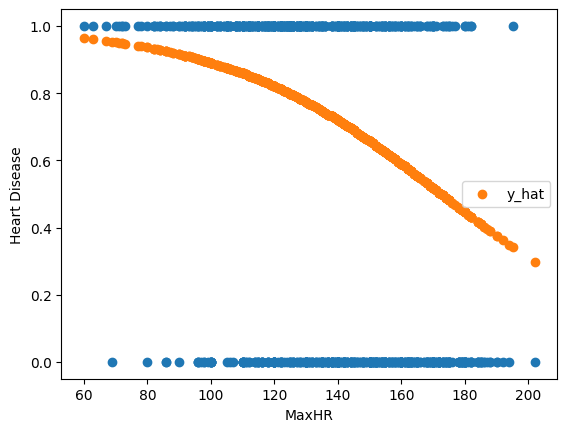

In [10]:
#This cell is to visualize and try to manually test the weight and bias for prediction 
w = np.array([-0.029]) # weight
b = 5#bias
test_pred = logistic_regression_model(x_train, y_train, w, b)#feeding the data to the logistic regression model
plt.scatter(x_train, y_train)
plt.xlabel('MaxHR')
plt.ylabel('Heart Disease')
plt.scatter(x_train, test_pred, label = 'y_hat')#visualize the prediction
print(f'using the weight of {w} and bias of {b}')
plt.legend()

<h3>As you can see with our manual inputs of weight and bias we can clearly say its not a good fit. To clearly understand how to fit the data we can set a threshold as half of the value if x < 0.5 then its 0 if x>= 0.5 then its a 1. lets visulize it.</h3>

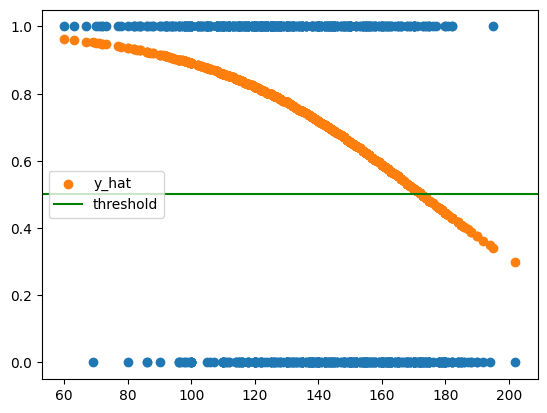

In [11]:
threshold = 0.5 
plt.scatter(x_train, y_train)
plt.scatter(x_train,test_pred , label= 'y_hat')
plt.axhline(y=threshold, linestyle='-', color = 'g', label = 'threshold')#The threshold line
plt.legend()

In [12]:
#comparing the Actual value and the Prediction value
df_filter['Test Predictions'] = np.round(test_pred).astype(int)
df_filter

,MaxHR,HeartDisease,Test Predictions
0,172,0,1
1,156,1,1
2,98,0,1
3,108,1,1
4,122,0,1
...,...,...,...
913,132,1,1
914,141,1,1
915,115,1,1
916,174,1,0


<h3>That's still overfitting and the cost function is not really optimal we can still improve it by implementing the gradient descent algorithm. from the ultra simplified formula below and implement.</h3>

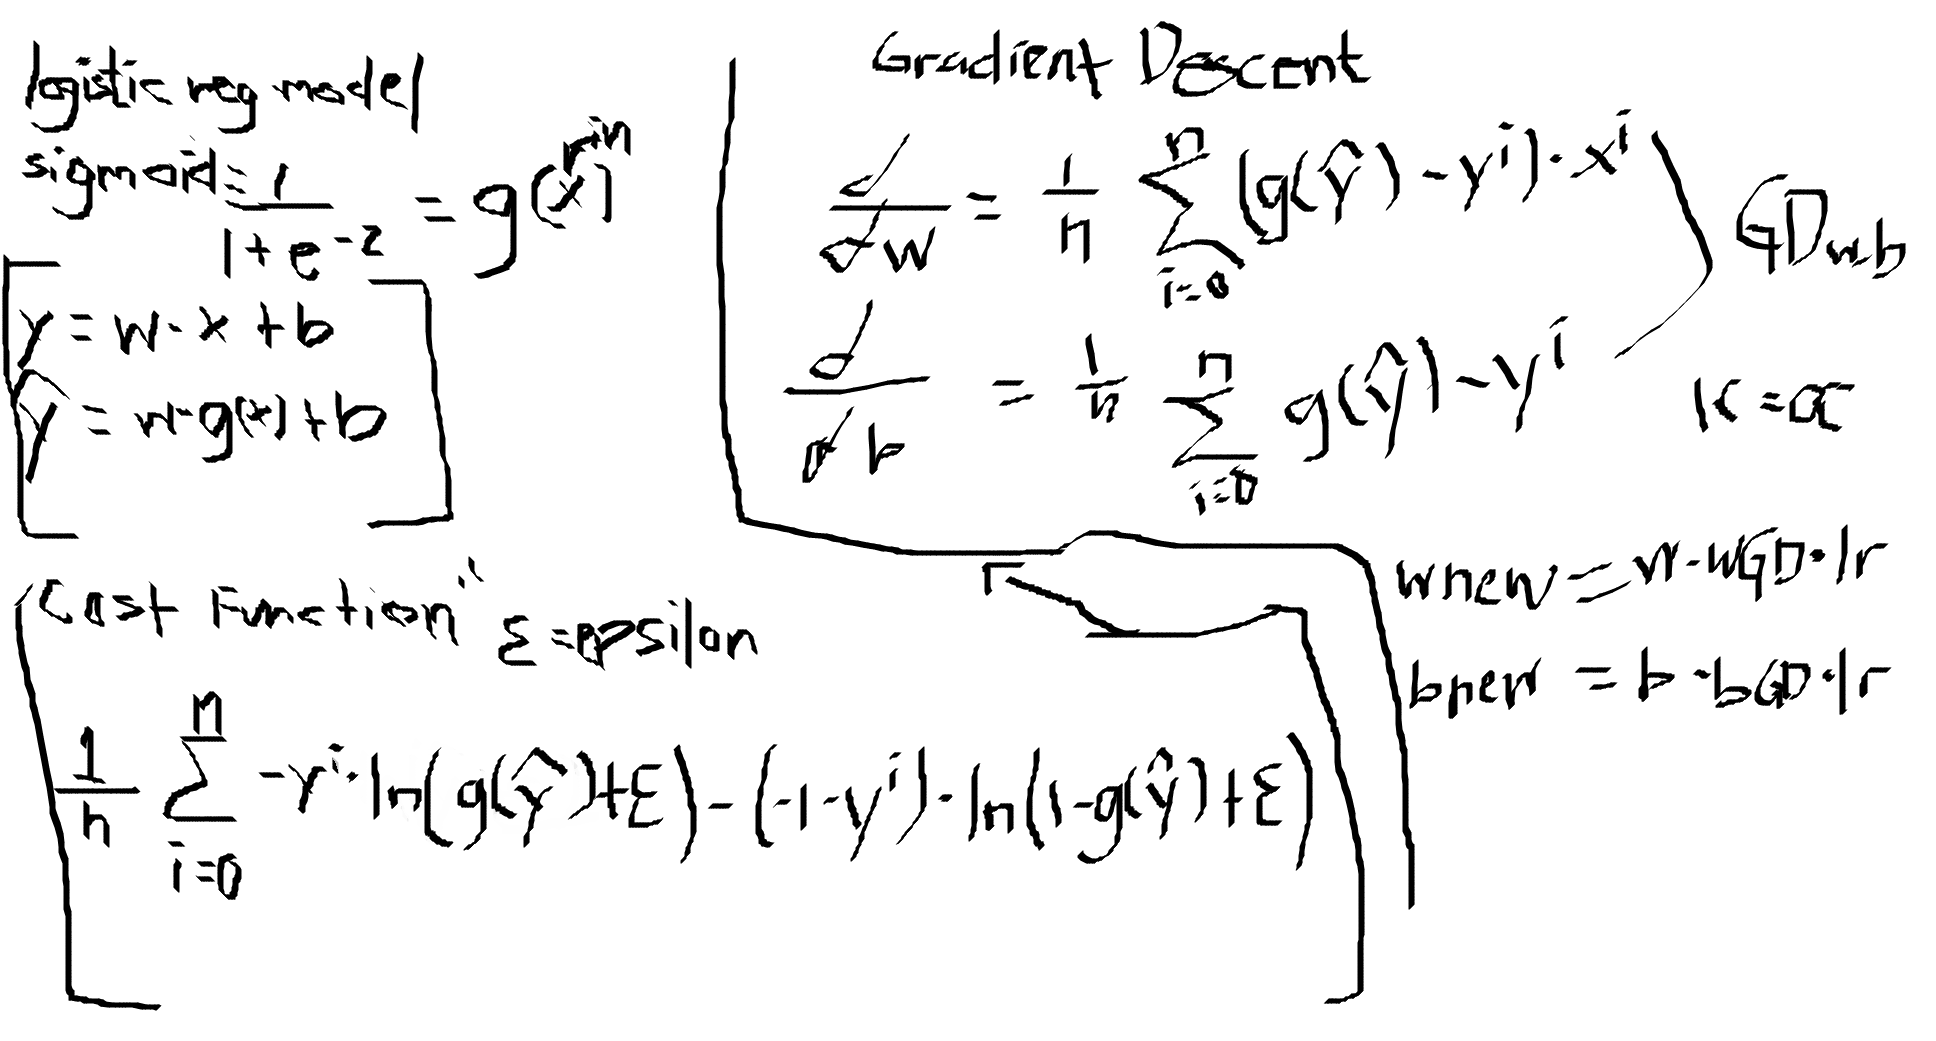

In [13]:
Image('images/logstic_reg_model_formulas.png')

0.6698790110924401


Text(0, 0.5, 'Cost')

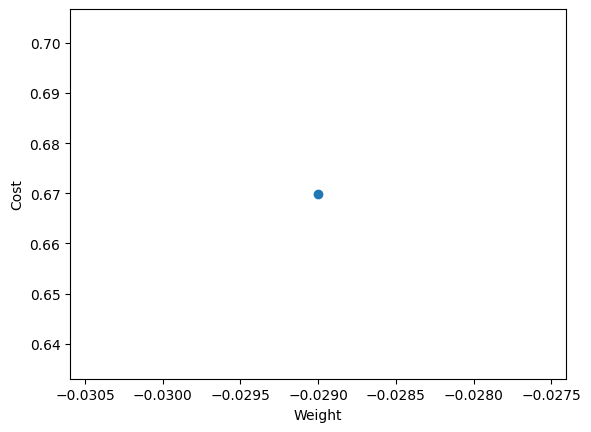

In [14]:
def cost_function(x,y, w, b):
    n= len(x)
    total_cost = 0
    epsilon = 1e-15
    for i in range(n):
        y_hat = sigmoid(np.dot(x[i], w) + b)
        cost = -y[i]*np.log(y_hat + epsilon) - (1-y[i])*np.log(1-y_hat + epsilon)
        total_cost += cost
    total_cost = total_cost/n
    return total_cost

loss = cost_function(x_train, y_train,w,b)
print(loss)
plt.scatter(w, loss)
plt.xlabel('Weight')
plt.ylabel('Cost')

In [15]:
#This is now the Gradient Descent algorithm implementation from the formula above 
def gradient_descent(x,y,w,b,learning_rate):
    n= len(x)
    w_gradient = 0
    b_gradient = 0
    
    for i in range(n):
        y_hat = sigmoid(np.dot(x[i], w) + b)

        w_gradient += (1/n)*(y_hat - y[i])*x[i]
        b_gradient += (1/n)*(y_hat - y[i])
        
    new_w = w - w_gradient * learning_rate
    new_b = b - b_gradient * learning_rate
    
    
    return new_w, new_b

In [16]:
w = np.array([-0.01])
b = 4.9
epoch = 1000
lr = 0.0001

for i in range(epoch):
    print(f'epoch of {i} : {epoch}')
    w,b = gradient_descent(x_train, y_train, w, b, lr)
    
print(f'Weight {w}, bias {b}')
new_loss = cost_function(x_train, y_train, w, b)
print(f'Previous Loss:{loss}, Current Loss{new_loss}')

epoch of 0 : 1000
epoch of 1 : 1000
epoch of 2 : 1000
epoch of 3 : 1000
epoch of 4 : 1000
epoch of 5 : 1000
epoch of 6 : 1000
epoch of 7 : 1000
epoch of 8 : 1000
epoch of 9 : 1000
epoch of 10 : 1000
epoch of 11 : 1000
epoch of 12 : 1000
epoch of 13 : 1000
epoch of 14 : 1000
epoch of 15 : 1000
epoch of 16 : 1000
epoch of 17 : 1000
epoch of 18 : 1000
epoch of 19 : 1000
epoch of 20 : 1000
epoch of 21 : 1000
epoch of 22 : 1000
epoch of 23 : 1000
epoch of 24 : 1000
epoch of 25 : 1000
epoch of 26 : 1000
epoch of 27 : 1000
epoch of 28 : 1000
epoch of 29 : 1000
epoch of 30 : 1000
epoch of 31 : 1000
epoch of 32 : 1000
epoch of 33 : 1000
epoch of 34 : 1000
epoch of 35 : 1000
epoch of 36 : 1000
epoch of 37 : 1000
epoch of 38 : 1000
epoch of 39 : 1000
epoch of 40 : 1000
epoch of 41 : 1000
epoch of 42 : 1000
epoch of 43 : 1000
epoch of 44 : 1000
epoch of 45 : 1000
epoch of 46 : 1000
epoch of 47 : 1000
epoch of 48 : 1000
epoch of 49 : 1000
epoch of 50 : 1000
epoch of 51 : 1000
epoch of 52 : 1000
epo

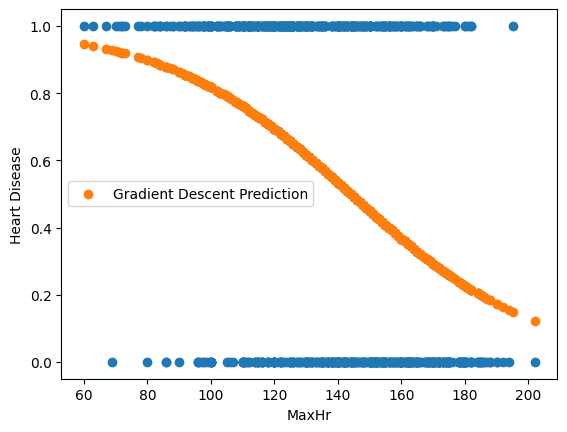

In [17]:
#Visualize the Gradient Descent algorithm results
gd_pred = logistic_regression_model(x_train, y_train, w, b)
plt.scatter(x_train, y_train)
plt.scatter(x_train, gd_pred, label = 'Gradient Descent Prediction')
plt.xlabel('MaxHr')
plt.ylabel('Heart Disease')
plt.legend()



<h3>Now thats looking good compare to the intentional fitting with the test prediction lets now view the data and compare it.</h3>

In [18]:
df_filter['Gradient Descent Pred.'] = np.round(gd_pred).astype(int)
df_filter

,MaxHR,HeartDisease,Test Predictions,Gradient Descent Pred.
0,172,0,1,0
1,156,1,1,0
2,98,0,1,1
3,108,1,1,1
4,122,0,1,1
...,...,...,...,...
913,132,1,1,1
914,141,1,1,1
915,115,1,1,1
916,174,1,0,0


<h3>Now the last part is to measure the accuracy with sklearn metrics to make it shorter.</h3>

In [19]:
#Now we calculate the accuracy 
from sklearn.metrics import accuracy_score
preds = gd_pred > 0.5

print('accuracy score of ',accuracy_score(preds,y_train))

accuracy score of  0.6710239651416122
